# Handiling Missing Value

In [14]:
import pandas as pd
import numpy as np
file_path = 'data/data.csv'
df = pd.read_csv(file_path, low_memory = False)
print('Setup Complete.')

Setup Complete.


In [15]:
df.head()

,Date,GameID,Drive,qtr,down,time,TimeUnder,TimeSecs,PlayTimeDiff,SideofField,...,yacEPA,Home_WP_pre,Away_WP_pre,Home_WP_post,Away_WP_post,Win_Prob,WPA,airWPA,yacWPA,Season
0,2009-09-10,2009091000,1,1,NaN,15:00,15,3600.0,0.0,TEN,...,NaN,0.485675,0.514325,0.546433,0.453567,0.485675,0.060758,NaN,NaN,2009
1,2009-09-10,2009091000,1,1,1.0,14:53,15,3593.0,7.0,PIT,...,1.146076,0.546433,0.453567,0.551088,0.448912,0.546433,0.004655,-0.032244,0.036899,2009
2,2009-09-10,2009091000,1,1,2.0,14:16,15,3556.0,37.0,PIT,...,NaN,0.551088,0.448912,0.510793,0.489207,0.551088,-0.040295,NaN,NaN,2009
3,2009-09-10,2009091000,1,1,3.0,13:35,14,3515.0,41.0,PIT,...,-5.031425,0.510793,0.489207,0.461217,0.538783,0.510793,-0.049576,0.106663,-0.156239,2009
4,2009-09-10,2009091000,1,1,4.0,13:27,14,3507.0,8.0,PIT,...,NaN,0.461217,0.538783,0.558929,0.441071,0.461217,0.097712,NaN,NaN,2009


In [16]:
# Checking for the missing value
missing_value_counts = df.isnull().sum()

# Looking for missing value in the first 20 columns
missing_value_counts[0:20]

Date                 0
GameID               0
Drive                0
qtr                  0
down             54218
time               188
TimeUnder            0
TimeSecs           188
PlayTimeDiff       374
SideofField        450
yrdln              723
yrdline100         723
ydstogo              0
ydsnet               0
GoalToGo           723
FirstDown        25597
posteam          21979
DefensiveTeam    21979
desc                 2
PlayAttempted        0
dtype: int64

In [20]:
# Total missing value
total_cells = np.product(df.shape)
total_missing = missing_value_counts.sum()

# Percentage of missing values
total_percent = (total_missing/total_cells)*100
print(total_percent)

27.652267428200588


# Scalling and Normalization

In [23]:
import seaborn as sns

In [31]:
# for Box-Cox Transformation
from scipy import stats

# for min_max scaling
# from mlxtend.preprocessing import minmax_scaling

# plotting modules

import matplotlib.pyplot as plt


In [33]:
df = np.random.exponential(size = 1000)
df

array([6.43345092e-01, 1.27577883e+00, 5.12644214e-03, 1.28935779e+00,
       1.01376347e+00, 4.34092913e-01, 1.40209533e+00, 6.66570838e-02,
       2.31679565e+00, 6.53989695e-01, 2.14299889e+00, 2.14587229e-01,
       6.87313774e-01, 1.41718024e+00, 6.41843476e-01, 7.02201046e-01,
       1.20444663e+00, 6.41718943e-01, 1.09512160e+00, 2.74058729e-01,
       4.67665848e-01, 1.45266617e-01, 2.59499147e-01, 2.84234025e-01,
       1.86617727e+00, 1.59255841e+00, 2.93694081e+00, 5.11900044e-01,
       5.22862973e-01, 4.15687073e-01, 1.19686054e+00, 1.03072252e+00,
       1.78739780e+00, 5.13693106e-02, 6.07567016e-01, 8.81222947e-02,
       1.90610886e-01, 2.67668590e-01, 8.04130270e-01, 2.31383729e+00,
       5.57087691e-01, 2.56431282e+00, 1.28464752e+00, 9.30217326e-01,
       1.01541312e+00, 1.67847515e+00, 6.11329286e-01, 1.88397268e+00,
       1.12778461e+00, 4.67552419e-01, 6.00810954e-01, 4.33660087e-01,
       2.63989484e-02, 1.58554993e+00, 5.11666688e-01, 6.78130162e-01,
      

/home/killjoy/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: ylabel='Count'>

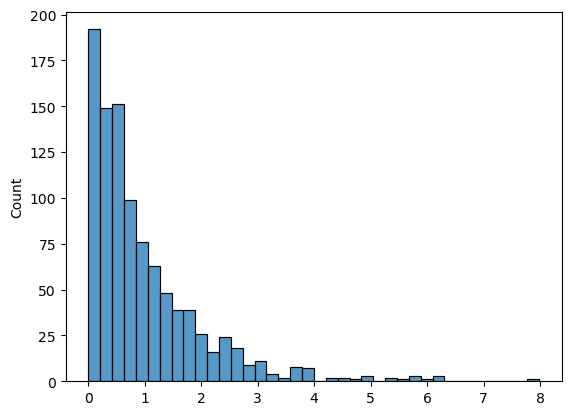

In [35]:
sns.histplot(df)

In [39]:
normal_data = stats.boxcox(df)

/home/killjoy/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/killjoy/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/killjoy/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


<Axes: ylabel='Count'>

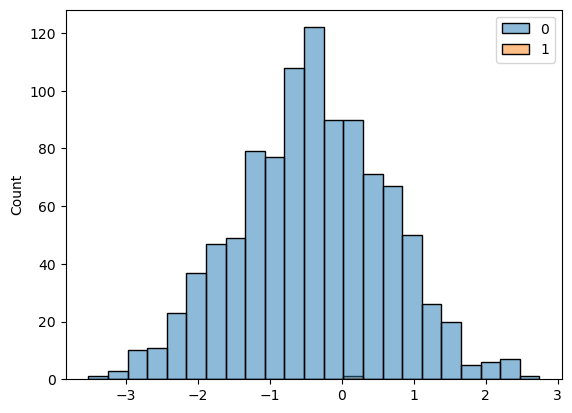

In [41]:
sns.histplot(normal_data)